In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
#Importaciones

In [3]:
# Generar valores aleatorios entre 0 y 1000
np.random.seed(42)  # Para reproducibilidad
x_values = np.random.uniform(0, 1000, 10000)
y_values = np.sqrt(x_values)  # Etiqueta (valor real de raíz cuadrada)

# Crear un DataFrame
dataset = pd.DataFrame({'X': x_values, 'Y': y_values})

# Mostrar las primeras filas
dataset.head()

,X,Y
0,374.540119,19.353039
1,950.714306,30.833655
2,731.993942,27.055387
3,598.658484,24.467499
4,156.018640,12.490742


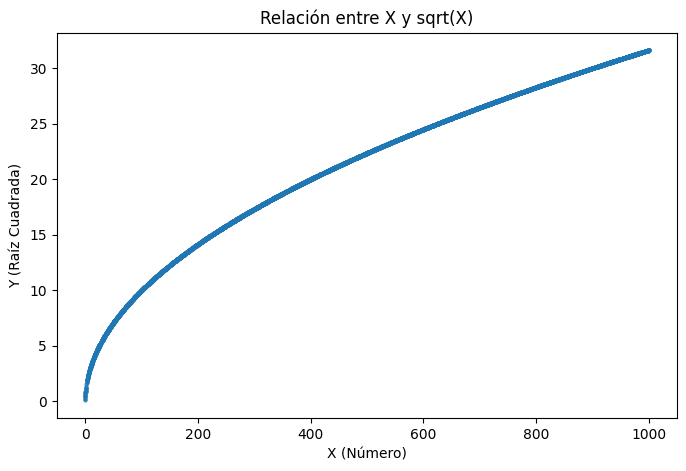

In [4]:
#Graficar los daots
plt.figure(figsize=(8, 5))
plt.scatter(dataset['X'], dataset['Y'], alpha=0.5, s=5)
plt.xlabel("X (Número)")
plt.ylabel("Y (Raíz Cuadrada)")
plt.title("Relación entre X y sqrt(X)")
plt.show()

In [5]:
# Dividir en datos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, Y_train, Y_test = train_test_split(dataset[['X']], dataset['Y'], test_size=0.2, random_state=42)

In [6]:
# Crear y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, Y_train)

# Ver coeficientes del modelo
print(f"Coeficiente: {model.coef_[0]:.4f}")
print(f"Intercepto: {model.intercept_:.4f}")

Coeficiente: 0.0254
Intercepto: 8.4052


In [7]:
# Hacer predicciones
Y_pred = model.predict(X_test)

# Calcular el error absoluto medio
error_mae = mean_absolute_error(Y_test, Y_pred)
print(f"Error Absoluto Medio (MAE): {error_mae:.4f}")


Error Absoluto Medio (MAE): 1.1722


In [8]:
# Seleccionar 10 valores de prueba aleatorios
X_sample = X_test.sample(10, random_state=42)
Y_real = np.sqrt(X_sample).values.flatten()
Y_pred_sample = model.predict(X_sample)

# Comparar resultados
print("\nComparación de resultados:")
for i in range(10):
    print(f"X: {X_sample.iloc[i, 0]:.2f} | Raíz real: {Y_real[i]:.4f} | Predicción ML: {Y_pred_sample[i]:.4f}")



Comparación de resultados:
X: 826.34 | Raíz real: 28.7461 | Predicción ML: 29.3741
X: 41.67 | Raíz real: 6.4555 | Predicción ML: 9.4626
X: 254.64 | Raíz real: 15.9575 | Predicción ML: 14.8669
X: 259.58 | Raíz real: 16.1114 | Predicción ML: 14.9921
X: 555.13 | Raíz real: 23.5613 | Predicción ML: 22.4921
X: 509.76 | Raíz real: 22.5778 | Predicción ML: 21.3406
X: 333.70 | Raíz real: 18.2676 | Predicción ML: 16.8731
X: 182.81 | Raíz real: 13.5209 | Predicción ML: 13.0442
X: 936.13 | Raíz real: 30.5962 | Predicción ML: 32.1600
X: 482.49 | Raíz real: 21.9657 | Predicción ML: 20.6488


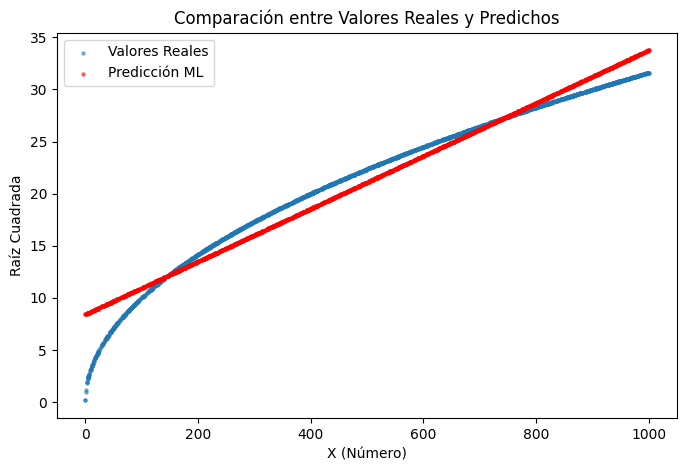

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, Y_test, label="Valores Reales", alpha=0.5, s=5)
plt.scatter(X_test, Y_pred, label="Predicción ML", alpha=0.5, s=5, color="red")
plt.xlabel("X (Número)")
plt.ylabel("Raíz Cuadrada")
plt.title("Comparación entre Valores Reales y Predichos")
plt.legend()
plt.show()
